# 体重データ分析

In [1]:
import pandas as pd
import datetime
import seaborn as sns
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
WEIGHTS_PATH = "../data/all_weights.csv"
weights = pd.read_csv(WEIGHTS_PATH, index_col='date', parse_dates=True)

In [3]:
df = weights

## データ分析

In [4]:
df["year"] = df.index.year
df["month"] = df.index.month
df["week_of_month"] = df.index.week
df["year_and_wom"] = df.index.strftime('%Y-W%W')

### 週別の集計

In [5]:
groupby = df.groupby('year_and_wom')

In [6]:
df_by_week = pd.DataFrame()
df_by_week["体重"] = round(groupby["weight"].mean(), 1)
df_by_week["BMI"] = round(groupby["bmi"].mean(), 1)

In [7]:
df_by_week["増減"] = df_by_week.diff()["体重"]

In [8]:
df_by_week["週番号"] = df_by_week.index
df_by_week["date"] = df_by_week["週番号"].apply(lambda x: datetime.datetime.strptime(x + '-0', "%Y-W%W-%w"))
df_by_week.set_index("date", inplace=True)

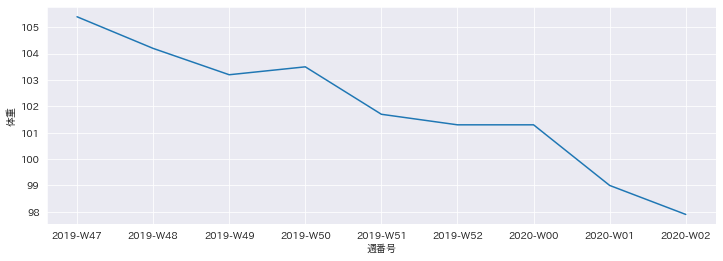

In [9]:
plt.figure(figsize=(12,4))
sns.lineplot(data=df_by_week, x='週番号', y='体重')

In [10]:
df_by_week.drop(["週番号"], axis=1, inplace=True)
df_by_week.index.name = '週別'

In [11]:
df_by_week.tail(42)

,体重,BMI,増減
週別,,,
2019-12-01,105.4,36.0,NaN
2019-12-08,104.2,35.6,-1.2
2019-12-15,103.2,35.2,-1.0
2019-12-22,103.5,35.4,0.3
2019-12-29,101.7,34.7,-1.8
2020-01-05,101.3,34.6,-0.4
2020-01-05,101.3,34.6,0.0
2020-01-12,99.0,33.8,-2.3
2020-01-19,97.9,33.4,-1.1


## データ可視化